In [1]:
#We import all the libraries necessary for the analysis

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

!pip install shap
import shap

     |████████████████████████████████| 564 kB 21.5 MB/s 


In [2]:
#We read the tidy file and import it

data = pd.read_csv("https://raw.githubusercontent.com/sharkman424/sds322_team4/main/Tidy%20file%20(2)")
data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,heating_load,cooling_load,glazing_area_distribution1,glazing_area_distribution2,glazing_area_distribution3,glazing_area_distribution4,glazing_area_distribution5,orientation2,orientation3,orientation4,orientation5
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,0,0,0,0,1,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,0,0,0,0,0,1,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,0,0,0,0,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,0,0,0,0,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,0,0,0,0,0,1,0,0,0


In [3]:
#We now create a data frame that contains all the X variables and one for each response variable

X =  data[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 
           'overall_height', 'glazing_area', 'glazing_area_distribution1', 
           'glazing_area_distribution2', 'glazing_area_distribution3', 'glazing_area_distribution4', 
           'glazing_area_distribution5', 'orientation2', 'orientation3', 'orientation4', 'orientation5']]

heating_load = data['heating_load']
cooling_load = data['cooling_load']


,Variables,Heating load coefficients,Cooling load coefficients
0,relative compactness,-5.884656e+01,-6.496461e+01
1,surface area,-1.379962e+09,-4.794439e+11
2,wall area,1.379962e+09,4.794439e+11
3,roof area,2.759924e+09,9.588879e+11
4,overall height,3.864760e+00,4.212142e+00
5,glazing area,1.621128e+01,1.323144e+01
6,glazing area distribution1,4.960494e+00,2.164747e+00
7,glazing area distribution2,4.656717e+00,1.775645e+00
8,glazing area distribution3,4.558893e+00,1.590791e+00
9,glazing area distribution4,4.699235e+00,2.047108e+00


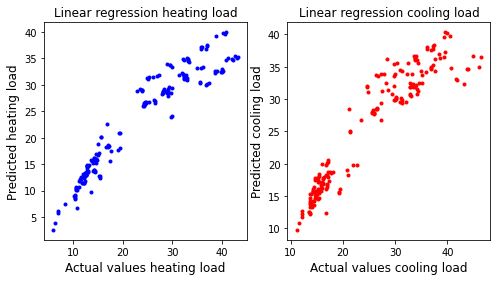

In [4]:
#We divide the data into training and testing samples

X_train, X_test, heating_load_train, heating_load_test = train_test_split(X, heating_load, random_state=0)

#We fit the training data with the linear regression model, then predict the y values using the 
#x testing data and finally calculate the out of sample (or testing) MSE

reg1 = linear_model.LinearRegression()
reg1.fit(X_train, heating_load_train)
y_pred1_reg = reg1.predict(X_test)
mse_1_reg = np.mean((heating_load_test - y_pred1_reg)**2)



figure = plt.figure(figsize=(8, 4))

#subplot for r1 regression
ax = plt.subplot(1,2,1)
plt.title('Linear regression heating load')
plt.xlabel('Actual values heating load', size=12)
plt.ylabel('Predicted heating load', size=12)
plt.plot(heating_load_test,y_pred1_reg , '.b')


#Now we will do it to predict the cooling_load response variable

X_train2, X_test2, cooling_load_train2, cooling_load_test2 = train_test_split(X, cooling_load, random_state=0)

reg2 = linear_model.LinearRegression()
reg2.fit(X_train2, cooling_load_train2)
y_pred2_reg = reg2.predict(X_test2)

mse_2_reg = np.mean((cooling_load_test2 - y_pred2_reg)**2)


#subplot for r2 regression
ax = plt.subplot(1,2,2)
plt.title('Linear regression cooling load')
plt.xlabel('Actual values cooling load', size=12)
plt.ylabel('Predicted cooling load', size=12)
plt.plot(cooling_load_test2,y_pred2_reg , '.b', color = 'red')



info= {'Variables':  ['relative compactness', 'surface area', 'wall area', 'roof area', 
           'overall height', 'glazing area', 'glazing area distribution1', 
           'glazing area distribution2', 'glazing area distribution3', 'glazing area distribution4', 
           'glazing area distribution5', 'orientation2', 'orientation3', 'orientation4', 'orientation5'],
        'Heating load coefficients': reg1.coef_, 
        'Cooling load coefficients': reg2.coef_}

df = pd.DataFrame(info)

df

#We can see that although the linear regression seems to be a good model for prediction since it has a low MSE, the coefficients obtained are huge,
#which is not logical at all. This might confirm the initial intuition that the relationship between the variables is not linear. 


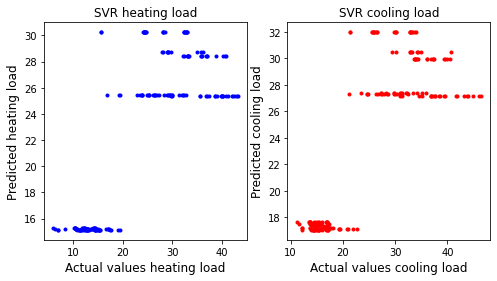

In [5]:
#We will now try other other regression models, to see which one has the best fit. We follow the same procedure as above
from sklearn.svm import SVR
figure2 = plt.figure(figsize=(8, 4))

X_train, X_test, heating_load_train, heating_load_test = train_test_split(X, heating_load, random_state=0)

SVR1 = SVR()
SVR1.fit(X_train, heating_load_train) 
y_pred1_svm = SVR1.predict(X_test)

mse_1_svr = np.mean((heating_load_test - y_pred1_svm)**2)


#subplot for r1 regression
ax = plt.subplot(1,2,1)
plt.title('SVR heating load')
plt.xlabel('Actual values heating load', size=12)
plt.ylabel('Predicted heating load', size=12)
plt.plot(heating_load_test, y_pred1_svm  , '.b')


X_train2, X_test2, cooling_load_train2, cooling_load_test2 = train_test_split(X, cooling_load, random_state=0)

SVR2 = SVR()
SVR2.fit(X_train2, cooling_load_train2) 
y_pred2_svm = SVR2.predict(X_test2)


mse_2_svr = np.mean((cooling_load_test2 - y_pred2_svm)**2)


#subplot for r2 regression
ax = plt.subplot(1,2,2)
plt.title('SVR cooling load')
plt.xlabel('Actual values cooling load', size=12)
plt.ylabel('Predicted cooling load', size=12)
plt.plot(cooling_load_test2,y_pred2_svm , '.b', color = 'red')

#We can see that the SVR model does not fit our data accurately 


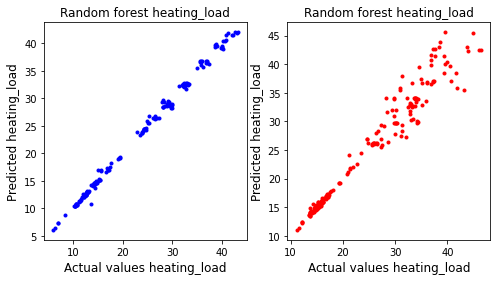

In [6]:
from sklearn.ensemble import RandomForestRegressor
figure3 = plt.figure(figsize=(8, 4))

X_train, X_test, heating_load_train, heating_load_test = train_test_split(X, heating_load, random_state=0)

randomforest1 = RandomForestRegressor()
randomforest1.fit(X_train, heating_load_train)
y_pred1_randomf = randomforest1.predict(X_test)

mse_1_randomf = np.mean((heating_load_test - y_pred1_randomf)**2)


ax = plt.subplot(1,2,1)
plt.title('Random forest heating_load')
plt.xlabel('Actual values heating_load', size=12)
plt.ylabel('Predicted heating_load', size=12)
plt.plot(heating_load_test, y_pred1_randomf , '.b')

#cooling_load

X_train4, X_test4, cooling_load_train4, cooling_load_test4 = train_test_split(X, cooling_load, random_state=0)

randomforest2 = RandomForestRegressor()
randomforest2.fit(X_train4, cooling_load_train4)
y_pred2_randomf = randomforest2.predict(X_test4)

mse_2_randomf = np.mean((cooling_load_test4- y_pred2_randomf)**2)

ax = plt.subplot(1,2,2)
plt.title('Random forest heating_load')
plt.xlabel('Actual values heating_load', size=12)
plt.ylabel('Predicted heating_load', size=12)
plt.plot(cooling_load_test4, y_pred2_randomf , '.b', color = 'red')

In [7]:

info2= {'Response variable':  ['heating load', 'heating load', 'heating load', 'cooling load', 'cooling load', 'cooling load'],
        'Regression model': ['linear regression', 'SVR', 'random forest', 'linear regression', 'SVR', 'random forest'], 
        'Testing MSE':  [mse_1_reg, mse_1_svr, mse_1_randomf, mse_2_reg, mse_2_svr, mse_2_randomf]}

df2 = pd.DataFrame(info2)

print(df2)

  Response variable   Regression model  Testing MSE
0      heating load  linear regression     9.316846
1      heating load                SVR    40.248954
2      heating load      random forest     0.323860
3      cooling load  linear regression     9.838307
4      cooling load                SVR    32.653352
5      cooling load      random forest     4.125815


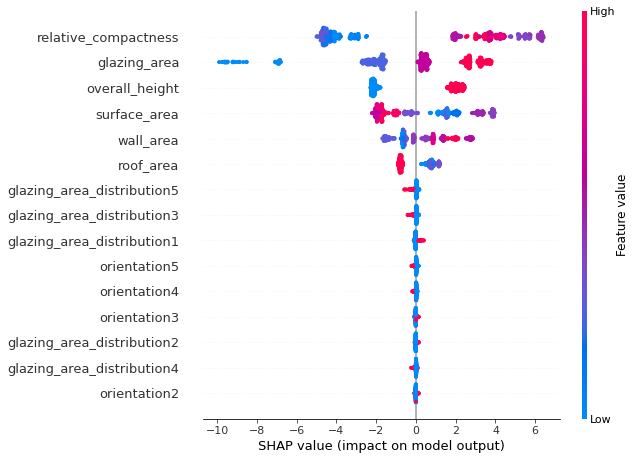

In [10]:
import shap
explainer = shap.Explainer(randomforest1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



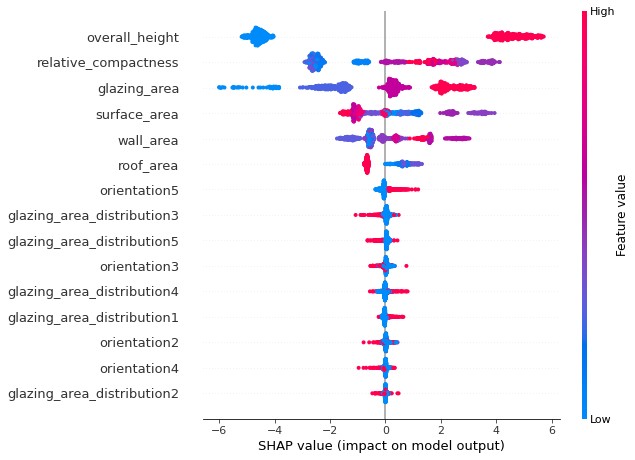

In [12]:
explainer1 = shap.Explainer(randomforest2)
shap_values1 = explainer1.shap_values(X)
shap.summary_plot(shap_values1, X)